In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

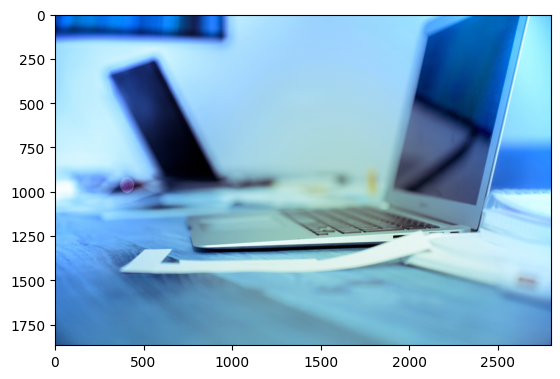

In [8]:
#Image Creation and Image Display
image = cv2.imread('images/image1.jpg')
plt.imshow(image)
plt.show()


In [9]:
#Accessing height, widths and channels with OpenCV
height,width,channels = image.shape

print(f"Height: {height}, Width: {width}, Channels: {channels}")

Height: 1867, Width: 2800, Channels: 3


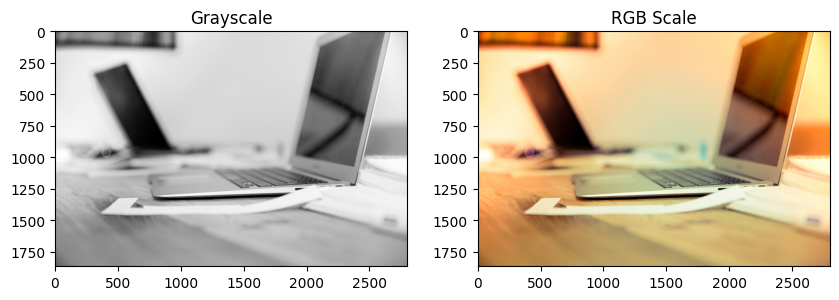

In [10]:
#Color Conversion ( Gray Scale and RGB )
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

rgbScale = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(grayscale,cmap='gray')
plt.title('Grayscale')

plt.subplot(2,2,2)
plt.imshow(rgbScale)
plt.title('RGB Scale')

plt.show()

Text(0.5, 1.0, 'Resized Image')

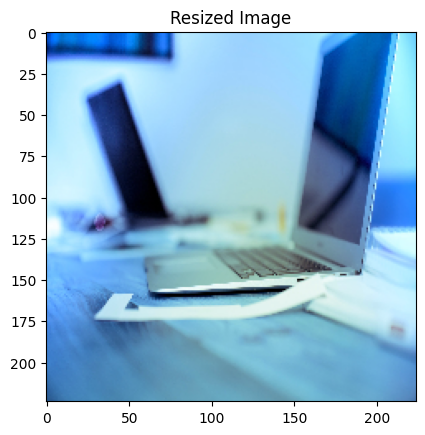

In [11]:
# Sampling

# 1. Resizing the image
resized_image = cv2.resize(image, (224, 224))
plt.imshow(resized_image)
plt.title('Resized Image')




Text(0.5, 1.0, 'Quantized Image')

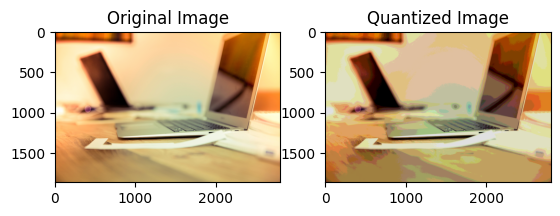

In [12]:
# Quantization of Image
# Convert image to 8-bit depth (quantization)
image_8bit = np.uint8(image / 32) * 32  # Reduce color depth

# Display the original and quantized images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_8bit, cv2.COLOR_BGR2RGB))
plt.title('Quantized Image')



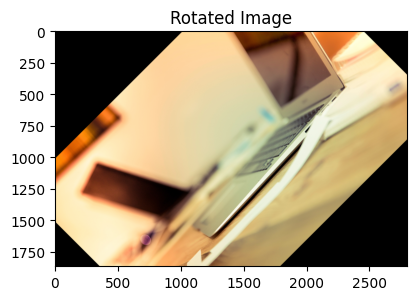

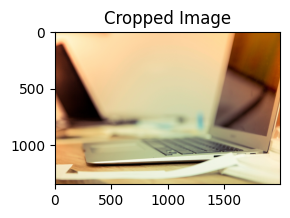

In [13]:
# Cropping an Image

cropped = image[150:1500, 500:2500]

#Rotating an Image
# Get the image dimensions
(h, w) = image.shape[:2]
center = (w // 2, h // 2)

# Define rotation matrix (rotate 45 degrees)
M = cv2.getRotationMatrix2D(center, 45, 1.0)

# Apply rotation
rotated = cv2.warpAffine(image, M, (w, h))


plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image')
plt.show()

plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.show()

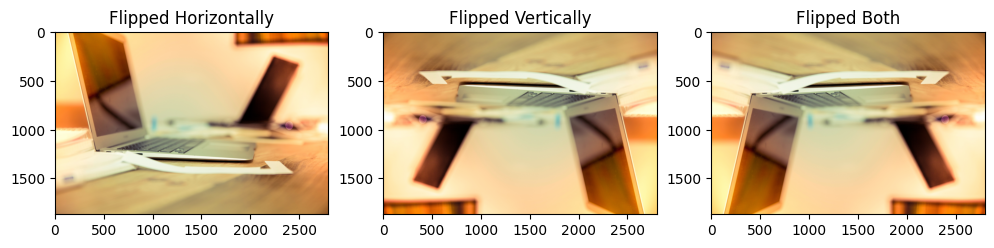

In [14]:
# Flip an Image
# Flip horizontally
flipped_horizontally = cv2.flip(image, 1)

# Flip vertically
flipped_vertically = cv2.flip(image, 0)

# Flip both horizontally and vertically
flipped_both = cv2.flip(image, -1)

# Display flipped images
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(cv2.cvtColor(flipped_horizontally, cv2.COLOR_BGR2RGB))
axs[0].set_title('Flipped Horizontally')

axs[1].imshow(cv2.cvtColor(flipped_vertically, cv2.COLOR_BGR2RGB))
axs[1].set_title('Flipped Vertically')

axs[2].imshow(cv2.cvtColor(flipped_both, cv2.COLOR_BGR2RGB))
axs[2].set_title('Flipped Both')

plt.show()

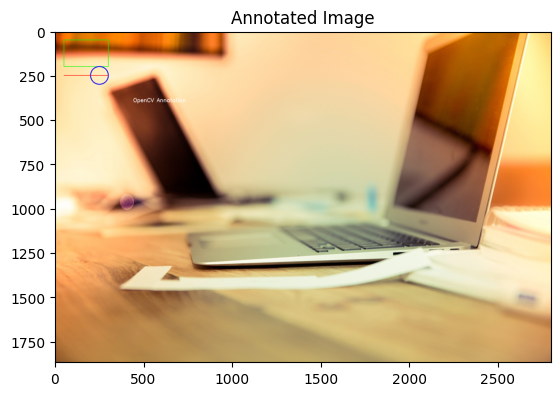

In [15]:
# Annotate an image

# Draw a rectangle (x1, y1) to (x2, y2)
cv2.rectangle(image, (50, 50), (300, 200), (0, 255, 0), 2)

# Draw a circle (center_x, center_y) with radius
cv2.circle(image, (250, 250), 50, (255, 0, 0), 3)

# Draw a line (start_x, start_y) to (end_x, end_y)
cv2.line(image, (50, 250), (300, 250), (0, 0, 255), 2)

# Add text
cv2.putText(image, "OpenCV Annotation", (440, 400),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# Show the annotated image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Annotated Image')
plt.show()



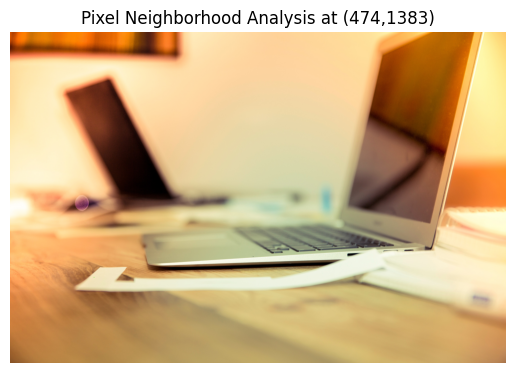

In [17]:
# Pixel NeighborHood Analysis

# Select a random pixel (not on edges)
h, w, _ = image.shape
x, y = random.randint(1, w-2), random.randint(1, h-2)

# Get 4-connected neighbors
neighbors_4 = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]

# Get 8-connected neighbors
neighbors_8 = neighbors_4 + [(x-1, y-1), (x+1, y-1), (x-1, y+1), (x+1, y+1)]

# Highlight pixel and neighbors
image_copy = rgbScale.copy()
for nx, ny in neighbors_4:
    image_copy[ny, nx] = [255, 0, 0]  # Mark 4-neighbors in blue
for nx, ny in neighbors_8:
    image_copy[ny, nx] = [0, 255, 0]  # Mark 8-neighbors in green
image_copy[y, x] = [255, 255, 0]  # Mark selected pixel in yellow

# Show result
plt.imshow(image_copy)
plt.title(f'Pixel Neighborhood Analysis at ({x},{y})')
plt.axis('off')
plt.show()